In [660]:
import yfinance as yf
import mplfinance as mpf

btc = yf.Ticker('BTC-USD')

btc_hist = btc.history(period='1mo', interval='15m')

# drop the columns that are not needed
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

print(len(btc_hist))

btc_hist

2880


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-14 09:00:00+00:00,67114.429688,67114.429688,66999.992188,66999.992188,0
2024-06-14 09:15:00+00:00,67029.625000,67060.226562,66981.734375,67047.804688,52090880
2024-06-14 09:30:00+00:00,67027.804688,67027.804688,66880.507812,66880.507812,0
2024-06-14 09:45:00+00:00,66891.218750,66921.671875,66871.773438,66888.351562,0
2024-06-14 10:00:00+00:00,66875.617188,66921.242188,66846.312500,66906.484375,1587200
...,...,...,...,...,...
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952
2024-07-14 08:15:00+00:00,60134.070312,60395.136719,60134.070312,60395.136719,199708672


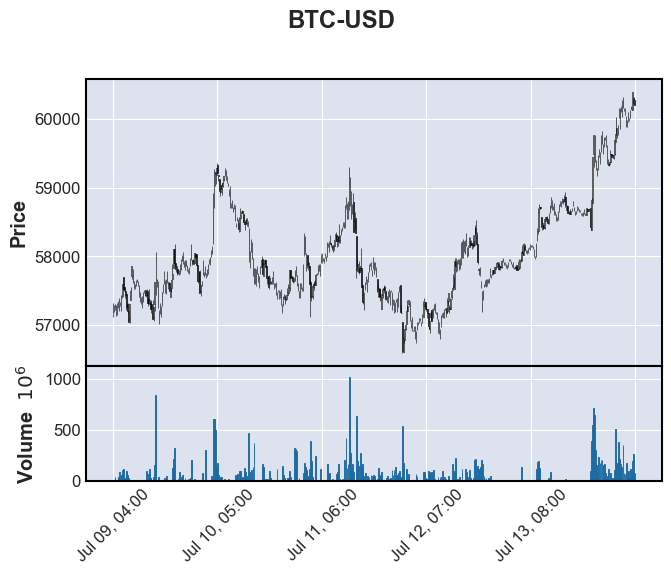

In [661]:
mpf.plot(btc_hist[-500:], type='candle', volume=True, title='BTC-USD')

In [663]:
# compute most popular indicators using ta library.
import pandas as pd
import pandas_ta as ta

btc_hist.set_index(pd.DatetimeIndex(btc_hist.index), inplace=True)

# # moving averages
btc_hist.ta.sma(length=10, append=True)
btc_hist.ta.sma(length=50, append=True)
btc_hist.ta.sma(length=200, append=True)

# exponential moving averages
btc_hist.ta.ema(length=10, append=True)
btc_hist.ta.ema(length=50, append=True)
btc_hist.ta.ema(length=200, append=True)

# RSI
btc_hist.ta.rsi(length=14, append=True)

# MACD
btc_hist.ta.macd(append=True)

# Bollinger Bands
btc_hist.ta.bbands(append=True)

# ATR
btc_hist.ta.atr(append=True)

# ADX
btc_hist.ta.adx(append=True)

# Stochastics
btc_hist.ta.stoch(append=True)
btc_hist.ta.stochrsi(append=True)

# also add for each time frame the indicators of the previous time frame
btc_hist['SMA_10_prev'] = btc_hist['SMA_10'].shift(1)
btc_hist['SMA_50_prev'] = btc_hist['SMA_50'].shift(1)
btc_hist['SMA_200_prev'] = btc_hist['SMA_200'].shift(1)
btc_hist['EMA_10_prev'] = btc_hist['EMA_10'].shift(1)
btc_hist['EMA_50_prev'] = btc_hist['EMA_50'].shift(1)
btc_hist['EMA_200_prev'] = btc_hist['EMA_200'].shift(1)
btc_hist['RSI_14_prev'] = btc_hist['RSI_14'].shift(1)
btc_hist['MACD_12_26_9_prev'] = btc_hist['MACD_12_26_9'].shift(1)
btc_hist['MACDh_12_26_9_prev'] = btc_hist['MACDh_12_26_9'].shift(1)
btc_hist['MACDs_12_26_9_prev'] = btc_hist['MACDs_12_26_9'].shift(1)
btc_hist['BBM_5_2.0_prev'] = btc_hist['BBM_5_2.0'].shift(1)
btc_hist['BBU_5_2.0_prev'] = btc_hist['BBU_5_2.0'].shift(1)
btc_hist['BBL_5_2.0_prev'] = btc_hist['BBL_5_2.0'].shift(1)
btc_hist['ATRr_14_prev'] = btc_hist['ATRr_14'].shift(1)
btc_hist['ADX_14_prev'] = btc_hist['ADX_14'].shift(1)
btc_hist['STOCHk_14_3_3_prev'] = btc_hist['STOCHk_14_3_3'].shift(1)
btc_hist['STOCHd_14_3_3_prev'] = btc_hist['STOCHd_14_3_3'].shift(1)
btc_hist['STOCHRSIk_14_14_3_3_prev'] = btc_hist['STOCHRSIk_14_14_3_3'].shift(1)
btc_hist['STOCHRSId_14_14_3_3_prev'] = btc_hist['STOCHRSId_14_14_3_3'].shift(1)

btc_hist

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 09:00:00+00:00,67114.429688,67114.429688,66999.992188,66999.992188,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 09:15:00+00:00,67029.625000,67060.226562,66981.734375,67047.804688,52090880,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 09:30:00+00:00,67027.804688,67027.804688,66880.507812,66880.507812,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 09:45:00+00:00,66891.218750,66921.671875,66871.773438,66888.351562,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 10:00:00+00:00,66875.617188,66921.242188,66846.312500,66906.484375,1587200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672,60071.153125,59442.680313,58344.858105,60016.739678,59536.655183,...,204.776118,59982.087500,60112.473637,59851.701363,151.207854,30.700281,57.670849,59.006404,18.542283,17.157169
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952,60077.267188,59472.818828,58360.089102,60042.640702,59561.068521,...,198.518058,59990.879687,60149.072984,59832.686391,149.711980,30.777191,59.751899,58.305096,27.548447,19.153761
2024-07-14 08:15:00+00:00,60134.070312,60395.136719,60134.070312,60395.136719,199708672,60089.929688,59507.527344,58375.547539,60106.730887,59593.777078,...,193.504778,60047.375000,60203.887561,59890.862439,143.889082,31.058985,63.276607,60.233118,37.555417,27.882049


In [664]:
dataset = btc_hist.copy()

First row index: 2024-06-16 11:00:00+00:00


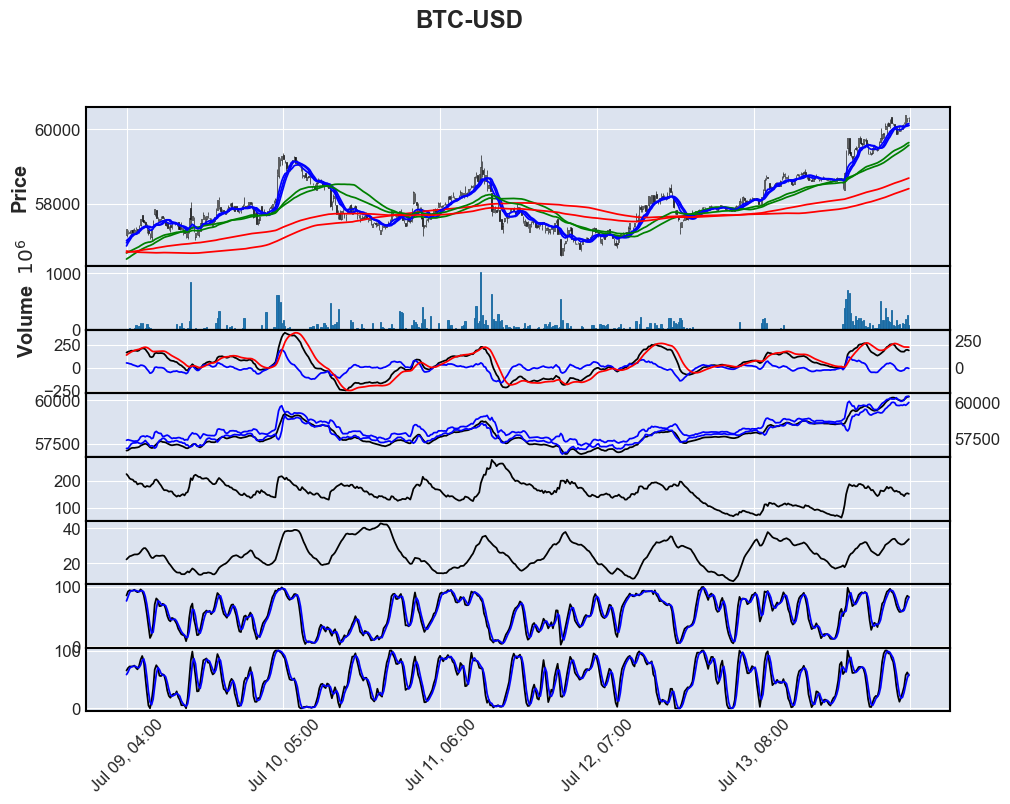

In [666]:
# find the first row index that has no NaN values. Similar to first_valid_index but return the row where all columns are not NaN
first_row = dataset.notnull().all(axis=1).idxmax()

print(f'First row index: {first_row}')

# drop the preceding rows
dataset = dataset.loc[first_row:]

to_plot = dataset[-500:]

# plot the data with the SMAs and EMAs, taking full screen width
mpf.plot(to_plot, type='candle', volume=True, title='BTC-USD', addplot=[
    mpf.make_addplot(to_plot['SMA_10'], color='blue'),
    mpf.make_addplot(to_plot['SMA_50'], color='green'),
    mpf.make_addplot(to_plot['SMA_200'], color='red'),
    mpf.make_addplot(to_plot['EMA_10'], color='blue'),
    mpf.make_addplot(to_plot['EMA_50'], color='green'),
    mpf.make_addplot(to_plot['EMA_200'], color='red'),
    mpf.make_addplot(to_plot['RSI_14'], panel=1, color='black'),
    mpf.make_addplot(to_plot['MACD_12_26_9'], panel=2, color='black'),
    mpf.make_addplot(to_plot['MACDh_12_26_9'], panel=2, color='blue'),
    mpf.make_addplot(to_plot['MACDs_12_26_9'], panel=2, color='red'),
    mpf.make_addplot(to_plot['BBM_5_2.0'], panel=3, color='black'),
    mpf.make_addplot(to_plot['BBU_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['BBL_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['ATRr_14'], panel=4, color='black'),
    mpf.make_addplot(to_plot['ADX_14'], panel=5, color='black'),
    mpf.make_addplot(to_plot['STOCHk_14_3_3'], panel=6, color='black'),
    mpf.make_addplot(to_plot['STOCHd_14_3_3'], panel=6, color='blue'),
    mpf.make_addplot(to_plot['STOCHRSIk_14_14_3_3'], panel=7, color='black'),
    mpf.make_addplot(to_plot['STOCHRSId_14_14_3_3'], panel=7, color='blue'),
], figscale=1.5)

In [667]:
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-16 11:00:00+00:00,66661.632812,66661.632812,66566.117188,66628.414062,40370176,66391.817187,66213.888906,66202.809492,66437.774700,66252.350978,...,50.428566,66439.917188,66689.645960,66190.188415,77.361880,28.753435,91.499906,86.009682,93.631804,82.663290
2024-06-16 11:15:00+00:00,66627.335938,66627.335938,66530.367188,66530.367188,8658944,66421.507031,66221.267344,66200.222305,66454.609698,66263.253574,...,59.677454,66497.118750,66761.872477,66232.365023,78.658577,31.786157,93.352413,89.717358,98.173715,90.980790
2024-06-16 11:30:00+00:00,66515.562500,66594.015625,66515.562500,66524.375000,17707008,66453.397656,66227.227031,66198.441641,66467.294298,66273.493630,...,67.500868,66537.995313,66740.148101,66335.842524,80.043455,33.806179,83.429718,89.427345,83.198099,91.667873
2024-06-16 11:45:00+00:00,66520.070312,66520.070312,66410.109375,66442.476562,39966720,66462.196094,66231.811094,66196.212266,66462.781983,66280.120412,...,73.771256,66571.168750,66675.282354,66467.055146,79.929860,35.359361,76.056032,84.279387,67.477311,82.949709
2024-06-16 12:00:00+00:00,66440.890625,66484.703125,66440.890625,66454.468750,25153536,66477.968750,66236.485781,66193.952188,66461.270486,66286.957602,...,77.264752,66553.310938,66700.182633,66406.439242,82.382416,34.824909,64.292140,74.592630,43.928356,64.867922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672,60071.153125,59442.680313,58344.858105,60016.739678,59536.655183,...,204.776118,59982.087500,60112.473637,59851.701363,151.207854,30.700281,57.670849,59.006404,18.542283,17.157169
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952,60077.267188,59472.818828,58360.089102,60042.640702,59561.068521,...,198.518058,59990.879687,60149.072984,59832.686391,149.711980,30.777191,59.751899,58.305096,27.548447,19.153761
2024-07-14 08:15:00+00:00,60134.070312,60395.136719,60134.070312,60395.136719,199708672,60089.929688,59507.527344,58375.547539,60106.730887,59593.777078,...,193.504778,60047.375000,60203.887561,59890.862439,143.889082,31.058985,63.276607,60.233118,37.555417,27.882049


In [668]:
# add a new column to the dataset that is the close value of the next row. This will be used to predict the next close value.
dataset['Next Close'] = dataset['Close'].shift(-1)
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-16 11:00:00+00:00,66661.632812,66661.632812,66566.117188,66628.414062,40370176,66391.817187,66213.888906,66202.809492,66437.774700,66252.350978,...,66439.917188,66689.645960,66190.188415,77.361880,28.753435,91.499906,86.009682,93.631804,82.663290,66530.367188
2024-06-16 11:15:00+00:00,66627.335938,66627.335938,66530.367188,66530.367188,8658944,66421.507031,66221.267344,66200.222305,66454.609698,66263.253574,...,66497.118750,66761.872477,66232.365023,78.658577,31.786157,93.352413,89.717358,98.173715,90.980790,66524.375000
2024-06-16 11:30:00+00:00,66515.562500,66594.015625,66515.562500,66524.375000,17707008,66453.397656,66227.227031,66198.441641,66467.294298,66273.493630,...,66537.995313,66740.148101,66335.842524,80.043455,33.806179,83.429718,89.427345,83.198099,91.667873,66442.476562
2024-06-16 11:45:00+00:00,66520.070312,66520.070312,66410.109375,66442.476562,39966720,66462.196094,66231.811094,66196.212266,66462.781983,66280.120412,...,66571.168750,66675.282354,66467.055146,79.929860,35.359361,76.056032,84.279387,67.477311,82.949709,66454.468750
2024-06-16 12:00:00+00:00,66440.890625,66484.703125,66440.890625,66454.468750,25153536,66477.968750,66236.485781,66193.952188,66461.270486,66286.957602,...,66553.310938,66700.182633,66406.439242,82.382416,34.824909,64.292140,74.592630,43.928356,64.867922,66546.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672,60071.153125,59442.680313,58344.858105,60016.739678,59536.655183,...,59982.087500,60112.473637,59851.701363,151.207854,30.700281,57.670849,59.006404,18.542283,17.157169,60159.195312
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952,60077.267188,59472.818828,58360.089102,60042.640702,59561.068521,...,59990.879687,60149.072984,59832.686391,149.711980,30.777191,59.751899,58.305096,27.548447,19.153761,60395.136719
2024-07-14 08:15:00+00:00,60134.070312,60395.136719,60134.070312,60395.136719,199708672,60089.929688,59507.527344,58375.547539,60106.730887,59593.777078,...,60047.375000,60203.887561,59890.862439,143.889082,31.058985,63.276607,60.233118,37.555417,27.882049,60303.332031


In [669]:
print(f'Number of NaN values in the dataset: {dataset.isnull().sum().sum()}')

# drop the last row as it has NaN values
dataset.dropna(inplace=True)

print(f'Number of NaN values in the dataset after dropping: {dataset.isnull().sum().sum()}')

dataset

Number of NaN values in the dataset: 1
Number of NaN values in the dataset after dropping: 0


,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-16 11:00:00+00:00,66661.632812,66661.632812,66566.117188,66628.414062,40370176,66391.817187,66213.888906,66202.809492,66437.774700,66252.350978,...,66439.917188,66689.645960,66190.188415,77.361880,28.753435,91.499906,86.009682,93.631804,82.663290,66530.367188
2024-06-16 11:15:00+00:00,66627.335938,66627.335938,66530.367188,66530.367188,8658944,66421.507031,66221.267344,66200.222305,66454.609698,66263.253574,...,66497.118750,66761.872477,66232.365023,78.658577,31.786157,93.352413,89.717358,98.173715,90.980790,66524.375000
2024-06-16 11:30:00+00:00,66515.562500,66594.015625,66515.562500,66524.375000,17707008,66453.397656,66227.227031,66198.441641,66467.294298,66273.493630,...,66537.995313,66740.148101,66335.842524,80.043455,33.806179,83.429718,89.427345,83.198099,91.667873,66442.476562
2024-06-16 11:45:00+00:00,66520.070312,66520.070312,66410.109375,66442.476562,39966720,66462.196094,66231.811094,66196.212266,66462.781983,66280.120412,...,66571.168750,66675.282354,66467.055146,79.929860,35.359361,76.056032,84.279387,67.477311,82.949709,66454.468750
2024-06-16 12:00:00+00:00,66440.890625,66484.703125,66440.890625,66454.468750,25153536,66477.968750,66236.485781,66193.952188,66461.270486,66286.957602,...,66553.310938,66700.182633,66406.439242,82.382416,34.824909,64.292140,74.592630,43.928356,64.867922,66546.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 07:30:00+00:00,59978.046875,60009.710938,59965.371094,60005.941406,35176448,60074.815234,59413.695391,58329.347500,59993.226099,59512.741077,...,60010.597656,60198.869899,59822.325413,159.428470,31.182349,57.492540,62.712476,11.370553,23.988908,60122.550781
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672,60071.153125,59442.680313,58344.858105,60016.739678,59536.655183,...,59982.087500,60112.473637,59851.701363,151.207854,30.700281,57.670849,59.006404,18.542283,17.157169,60159.195312
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952,60077.267188,59472.818828,58360.089102,60042.640702,59561.068521,...,59990.879687,60149.072984,59832.686391,149.711980,30.777191,59.751899,58.305096,27.548447,19.153761,60395.136719


In [670]:
# add a new column to the dataset that is the percentage change of the close value of the next row.
dataset['Expected Change'] = (dataset['Next Close'] - dataset['Close']) / dataset['Close']
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev,Next Close,Expected Change
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-16 11:00:00+00:00,66661.632812,66661.632812,66566.117188,66628.414062,40370176,66391.817187,66213.888906,66202.809492,66437.774700,66252.350978,...,66689.645960,66190.188415,77.361880,28.753435,91.499906,86.009682,93.631804,82.663290,66530.367188,-0.001472
2024-06-16 11:15:00+00:00,66627.335938,66627.335938,66530.367188,66530.367188,8658944,66421.507031,66221.267344,66200.222305,66454.609698,66263.253574,...,66761.872477,66232.365023,78.658577,31.786157,93.352413,89.717358,98.173715,90.980790,66524.375000,-0.000090
2024-06-16 11:30:00+00:00,66515.562500,66594.015625,66515.562500,66524.375000,17707008,66453.397656,66227.227031,66198.441641,66467.294298,66273.493630,...,66740.148101,66335.842524,80.043455,33.806179,83.429718,89.427345,83.198099,91.667873,66442.476562,-0.001231
2024-06-16 11:45:00+00:00,66520.070312,66520.070312,66410.109375,66442.476562,39966720,66462.196094,66231.811094,66196.212266,66462.781983,66280.120412,...,66675.282354,66467.055146,79.929860,35.359361,76.056032,84.279387,67.477311,82.949709,66454.468750,0.000180
2024-06-16 12:00:00+00:00,66440.890625,66484.703125,66440.890625,66454.468750,25153536,66477.968750,66236.485781,66193.952188,66461.270486,66286.957602,...,66700.182633,66406.439242,82.382416,34.824909,64.292140,74.592630,43.928356,64.867922,66546.906250,0.001391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 07:30:00+00:00,59978.046875,60009.710938,59965.371094,60005.941406,35176448,60074.815234,59413.695391,58329.347500,59993.226099,59512.741077,...,60198.869899,59822.325413,159.428470,31.182349,57.492540,62.712476,11.370553,23.988908,60122.550781,0.001943
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672,60071.153125,59442.680313,58344.858105,60016.739678,59536.655183,...,60112.473637,59851.701363,151.207854,30.700281,57.670849,59.006404,18.542283,17.157169,60159.195312,0.000609
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952,60077.267188,59472.818828,58360.089102,60042.640702,59561.068521,...,60149.072984,59832.686391,149.711980,30.777191,59.751899,58.305096,27.548447,19.153761,60395.136719,0.003922


In [671]:
# start of the ML part
# goal is to predict the 'Expected Change' column using the other columns in the dataset (except 'Next Close' column).
# the model will perform a regression task.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the dataset into features and target
X = dataset.drop(columns=['Next Close', 'Expected Change'])

# target
Y = dataset['Expected Change']

In [672]:
X

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-16 11:00:00+00:00,66661.632812,66661.632812,66566.117188,66628.414062,40370176,66391.817187,66213.888906,66202.809492,66437.774700,66252.350978,...,50.428566,66439.917188,66689.645960,66190.188415,77.361880,28.753435,91.499906,86.009682,93.631804,82.663290
2024-06-16 11:15:00+00:00,66627.335938,66627.335938,66530.367188,66530.367188,8658944,66421.507031,66221.267344,66200.222305,66454.609698,66263.253574,...,59.677454,66497.118750,66761.872477,66232.365023,78.658577,31.786157,93.352413,89.717358,98.173715,90.980790
2024-06-16 11:30:00+00:00,66515.562500,66594.015625,66515.562500,66524.375000,17707008,66453.397656,66227.227031,66198.441641,66467.294298,66273.493630,...,67.500868,66537.995313,66740.148101,66335.842524,80.043455,33.806179,83.429718,89.427345,83.198099,91.667873
2024-06-16 11:45:00+00:00,66520.070312,66520.070312,66410.109375,66442.476562,39966720,66462.196094,66231.811094,66196.212266,66462.781983,66280.120412,...,73.771256,66571.168750,66675.282354,66467.055146,79.929860,35.359361,76.056032,84.279387,67.477311,82.949709
2024-06-16 12:00:00+00:00,66440.890625,66484.703125,66440.890625,66454.468750,25153536,66477.968750,66236.485781,66193.952188,66461.270486,66286.957602,...,77.264752,66553.310938,66700.182633,66406.439242,82.382416,34.824909,64.292140,74.592630,43.928356,64.867922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 07:30:00+00:00,59978.046875,60009.710938,59965.371094,60005.941406,35176448,60074.815234,59413.695391,58329.347500,59993.226099,59512.741077,...,212.285880,60010.597656,60198.869899,59822.325413,159.428470,31.182349,57.492540,62.712476,11.370553,23.988908
2024-07-14 07:45:00+00:00,60014.425781,60136.207031,60014.425781,60122.550781,118556672,60071.153125,59442.680313,58344.858105,60016.739678,59536.655183,...,204.776118,59982.087500,60112.473637,59851.701363,151.207854,30.700281,57.670849,59.006404,18.542283,17.157169
2024-07-14 08:00:00+00:00,60140.269531,60190.742188,60140.269531,60159.195312,98301952,60077.267188,59472.818828,58360.089102,60042.640702,59561.068521,...,198.518058,59990.879687,60149.072984,59832.686391,149.711980,30.777191,59.751899,58.305096,27.548447,19.153761


In [673]:
Y

Datetime
2024-06-16 11:00:00+00:00   -0.001472
2024-06-16 11:15:00+00:00   -0.000090
2024-06-16 11:30:00+00:00   -0.001231
2024-06-16 11:45:00+00:00    0.000180
2024-06-16 12:00:00+00:00    0.001391
                               ...   
2024-07-14 07:30:00+00:00    0.001943
2024-07-14 07:45:00+00:00    0.000609
2024-07-14 08:00:00+00:00    0.003922
2024-07-14 08:15:00+00:00   -0.001520
2024-07-14 08:30:00+00:00   -0.001557
Name: Expected Change, Length: 2679, dtype: float64

In [674]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [675]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2411, 47)
X_test shape: (268, 47)
Y_train shape: (2411,)
Y_test shape: (268,)


In [676]:
X_train

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-07-05 22:15:00+00:00,56527.746094,56741.332031,56527.746094,56721.968750,104566784,56482.662500,56054.979375,57227.714531,56535.802087,56187.189720,...,156.755656,56522.212500,56647.026367,56397.398633,202.656039,18.008925,59.801120,67.266872,51.994196,48.995713
2024-06-22 16:45:00+00:00,64327.863281,64327.863281,64291.707031,64291.707031,0,64273.158203,64298.509688,64339.206641,64280.304137,64262.757027,...,-2.738551,64279.092969,64323.208964,64234.976973,45.135702,10.576734,44.887373,35.281190,53.084445,40.651708
2024-07-11 22:45:00+00:00,57472.355469,57472.921875,57222.234375,57309.546875,105981952,57454.101562,57911.146719,57997.244297,57454.079910,57736.978734,...,-131.388712,57454.653125,57545.516451,57363.789799,155.093085,22.617925,46.094995,37.202810,83.568682,59.118878
2024-07-08 20:00:00+00:00,56497.824219,56561.570312,56316.226562,56363.285156,138682368,56361.952344,56683.159766,56935.568555,56327.646679,56391.641758,...,-94.005011,56344.174219,56500.143397,56188.205041,255.390932,25.237308,87.045112,82.466047,90.032120,84.035477
2024-07-01 18:00:00+00:00,63577.105469,63657.410156,63532.273438,63568.503906,236412928,63233.385938,62967.418828,61950.985488,63271.952397,62956.466475,...,66.124415,63288.102344,63742.519747,62833.684940,141.165648,34.267768,100.000000,92.535672,96.611390,86.360159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03 12:30:00+00:00,60144.781250,60203.585938,59934.105469,60012.222656,297682944,60159.087500,60874.798984,62201.857227,60196.362394,60812.798594,...,-233.603347,60174.503125,60301.145499,60047.860751,151.731322,49.983604,45.545829,43.506142,80.605909,71.465713
2024-06-27 20:45:00+00:00,61465.359375,61483.929688,61399.468750,61426.964844,5498880,61504.542188,61466.115156,61387.944609,61497.246913,61464.825746,...,27.657613,61422.061719,61508.108666,61336.014771,143.840957,20.225736,15.880264,13.484370,8.567182,2.855727
2024-06-28 05:30:00+00:00,61521.820312,61526.960938,61424.265625,61424.265625,14489600,61623.699219,61616.386563,61332.977617,61588.658950,61592.430864,...,21.745047,61556.810937,61680.847678,61432.774197,117.661419,15.420789,17.546307,17.878333,21.314315,19.863313


In [677]:
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()

# scale while keeping the column names and datetime
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# the LSTM expects a 3D input, so reshape the data
X_train_scaled = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [678]:
X_train_scaled

array([[[-1.3887679 , -1.34940654, -1.36060196, ...,  0.6780836 ,
          0.09694938, -0.00183789]],

       [[ 1.0615424 ,  1.04419884,  1.06893233, ..., -0.50774266,
          0.13178248, -0.28093378]],

       [[-1.09203055, -1.11858467, -1.1432795 , ..., -0.43650116,
          1.10574339,  0.33676853]],

       ...,

       [[ 0.18005872,  0.16049393,  0.17163941, ..., -1.15293022,
         -0.88326228, -0.97627801]],

       [[-0.02481423, -0.04539055, -0.00714443, ...,  0.44573022,
         -0.54546699,  0.08733644]],

       [[ 0.15077766,  0.1294633 ,  0.11460279, ...,  0.10377167,
          1.00197935,  0.5901948 ]]])

In [679]:
X_test_scaled

array([[[ 1.31354704,  1.30324136,  1.31629067, ..., -1.34912205,
         -1.4140417 , -1.47145799]],

       [[ 0.78558354,  0.78685957,  0.80535326, ...,  1.63708956,
          1.06176762,  1.21110003]],

       [[-0.55051496, -0.47984893, -0.52558592, ..., -1.559938  ,
         -1.06071087, -1.09651566]],

       ...,

       [[ 0.01712437,  0.01503647,  0.03986148, ...,  0.61891382,
          1.63071834,  1.35480612]],

       [[-0.81553299, -0.84106033, -0.81502038, ...,  1.25654637,
          1.01000526,  0.56227681]],

       [[ 1.0322233 ,  1.01475191,  1.04752878, ..., -0.51153455,
         -1.05113141, -0.63777173]]])

In [680]:
# # now the same process but with a neural network (use MLPRegressor)
# from sklearn.neural_network import MLPRegressor
#
# # create the model
# model = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100000, random_state=42, alpha=0.0001,
#                      learning_rate_init=0.001, learning_rate='constant', tol=1e-4, n_iter_no_change=10,
#                      validation_fraction=0.1,
#                      early_stopping=True,
#                      activation='tanh',
#                      solver='adam',
#                      verbose=0
#                      )
#
# # train the model
# model.fit(X_train_scaled, Y_train)
#
# # print number of iterations
# print(f'Number of iterations: {model.n_iter_}')

In [681]:
# import os
# import numpy as np
#
# space = np.logspace(-2, -5, 10)
#
# pd.Series(space)

0    0.010000
1    0.004642
2    0.002154
3    0.001000
4    0.000464
5    0.000215
6    0.000100
7    0.000046
8    0.000022
9    0.000010
dtype: float64

In [682]:
# parameter_space = {
#     'hidden_layer_sizes': [(20, 20)],
#     'activation': ['tanh'],
#     'solver': ['adam'],
#     'learning_rate_init': space
# }
#
# from sklearn.model_selection import GridSearchCV
#
# cpu_count = os.cpu_count()
# print(f'Number of CPUs: {cpu_count}')
#
# clf = GridSearchCV(model, parameter_space, n_jobs=cpu_count-1, verbose=2)
# clf.fit(X_train_scaled, Y_train)
#
# print(f'Best parameters found: {clf.best_params_}')

In [684]:
# # plot the training loss, use log scale for y-axis
# # also add the validation scores
# import matplotlib.pyplot as plt
#
# plt.yscale('log')
# plt.xlabel('Number of Iterations')
# plt.title('Training Loss Curve')
#
# plt.plot(model.loss_curve_, label='Training Loss')
# plt.legend()
# plt.show()
#
# # also plot the validation scores
# plt.yscale('log')
# plt.xlabel('Number of Iterations')
# plt.title('Validation Scores')
#
# # opposite the validation scores
# values = [1 - x for x in model.validation_scores_]
#
# plt.plot(values, label='Validation Scores')
# plt.legend()
# plt.show()

In [685]:
# # make predictions
# predictions = model.predict(X_test_scaled)
#
# # calculate the mean squared error
# mse = mean_squared_error(Y_test, predictions)
# print(f'Mean Squared Error: {mse}')
#
# pd.Series(predictions, name='Predictions')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step


ValueError: Found array with dim 3. None expected <= 2.

In [687]:
# # plot the predictions vs the actual values as a scatter plot. Use the same scale for both axes.
# import matplotlib.pyplot as plt
#
# assert len(Y_test) == len(predictions)
#
# plt.scatter(Y_test, predictions)
# plt.xlabel('Actual Values')
# plt.ylabel('Predictions')
# plt.title('Actual vs Predicted Values')
#
# global_min = min(min(Y_test), min(predictions))
# global_max = max(max(Y_test), max(predictions))
#
# plt.xlim(global_min, global_max)
# plt.ylim(global_min, global_max)
#
# plt.plot([global_min, global_max], [global_min, global_max], color='red')
#
# plt.show()


In [688]:
# # show expected and predicted values as a dataframe
# df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions})
#
# # add a percentage of error column
# df['Error %'] = np.abs((df['Expected'] - df['Predicted']) / df['Expected']) * 100
#
# # format percentage of error column
# df['Error %'] = df['Error %'].map('{:.2f}%'.format)
#
# df

ValueError: Per-column arrays must each be 1-dimensional

In [689]:
import tensorflow as tf

# import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

# now train a model using keras and tensorflow on mac m1

input_count = X_train_scaled.shape[2]
print(f'Number of input features: {input_count}')

training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Number of input features: 47
Training size: 2386, Validation size: 25


In [690]:
X_train_scaled

array([[[-1.3887679 , -1.34940654, -1.36060196, ...,  0.6780836 ,
          0.09694938, -0.00183789]],

       [[ 1.0615424 ,  1.04419884,  1.06893233, ..., -0.50774266,
          0.13178248, -0.28093378]],

       [[-1.09203055, -1.11858467, -1.1432795 , ..., -0.43650116,
          1.10574339,  0.33676853]],

       ...,

       [[ 0.18005872,  0.16049393,  0.17163941, ..., -1.15293022,
         -0.88326228, -0.97627801]],

       [[-0.02481423, -0.04539055, -0.00714443, ...,  0.44573022,
         -0.54546699,  0.08733644]],

       [[ 0.15077766,  0.1294633 ,  0.11460279, ...,  0.10377167,
          1.00197935,  0.5901948 ]]])

In [691]:
Y_train

Datetime
2024-07-05 22:15:00+00:00   -0.001865
2024-06-22 16:45:00+00:00   -0.000461
2024-07-11 22:45:00+00:00    0.000442
2024-07-08 20:00:00+00:00    0.001311
2024-07-01 18:00:00+00:00   -0.001923
                               ...   
2024-07-03 12:30:00+00:00   -0.000775
2024-06-27 20:45:00+00:00    0.000360
2024-06-28 05:30:00+00:00    0.001782
2024-06-29 22:30:00+00:00    0.000105
2024-06-25 10:00:00+00:00   -0.000062
Name: Expected Change, Length: 2411, dtype: float64

In [692]:
training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Training size: 2386, Validation size: 25


In [693]:
X_train_scaled

array([[[-1.3887679 , -1.34940654, -1.36060196, ...,  0.6780836 ,
          0.09694938, -0.00183789]],

       [[ 1.0615424 ,  1.04419884,  1.06893233, ..., -0.50774266,
          0.13178248, -0.28093378]],

       [[-1.09203055, -1.11858467, -1.1432795 , ..., -0.43650116,
          1.10574339,  0.33676853]],

       ...,

       [[ 0.18005872,  0.16049393,  0.17163941, ..., -1.15293022,
         -0.88326228, -0.97627801]],

       [[-0.02481423, -0.04539055, -0.00714443, ...,  0.44573022,
         -0.54546699,  0.08733644]],

       [[ 0.15077766,  0.1294633 ,  0.11460279, ...,  0.10377167,
          1.00197935,  0.5901948 ]]])

In [694]:
X_train_scaled_arr = X_train_scaled

X_train_scaled_arr

array([[[-1.3887679 , -1.34940654, -1.36060196, ...,  0.6780836 ,
          0.09694938, -0.00183789]],

       [[ 1.0615424 ,  1.04419884,  1.06893233, ..., -0.50774266,
          0.13178248, -0.28093378]],

       [[-1.09203055, -1.11858467, -1.1432795 , ..., -0.43650116,
          1.10574339,  0.33676853]],

       ...,

       [[ 0.18005872,  0.16049393,  0.17163941, ..., -1.15293022,
         -0.88326228, -0.97627801]],

       [[-0.02481423, -0.04539055, -0.00714443, ...,  0.44573022,
         -0.54546699,  0.08733644]],

       [[ 0.15077766,  0.1294633 ,  0.11460279, ...,  0.10377167,
          1.00197935,  0.5901948 ]]])

In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
import keras

print(f'Shape of X_train_scaled_arr: {X_train_scaled_arr.shape}')

dropout = 0.8

# create the model, similar to the MLPRegressor model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_arr.shape[1], X_train_scaled_arr.shape[2])),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

# compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# set the learning rate
model.optimizer.learning_rate = 0.00001

# train with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, min_delta=0)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

# train it
model.fit(X_train_scaled_arr, Y_train, epochs=10000, validation_split=0.01, callbacks=[early_stopping])

Shape of X_train_scaled_arr: (2411, 1, 47)
Epoch 1/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.5165 - val_loss: 0.1850
Epoch 2/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5137 - val_loss: 0.1778
Epoch 3/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4488 - val_loss: 0.1706
Epoch 4/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5580 - val_loss: 0.1646
Epoch 5/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1913 - val_loss: 0.1593
Epoch 6/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2961 - val_loss: 0.1542
Epoch 7/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0894 - val_loss: 0.1492
Epoch 8/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4338 - val_loss: 0.1442
Epoch 9/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2512 - val_loss: 0.1413
Epoch 10/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2527 - val_loss: 0.1353
Epoch 11/10000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0222 - val_loss: 0.132

In [655]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
# log scale for y-axis
plt.yscale('log')
plt.legend()
plt.show()

KeyError: 'loss'

In [642]:
# make predictions
predictions = model.predict(X_test_scaled)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [644]:

# transform to 2d array
predictions = predictions.flatten()

In [646]:

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions.flatten()})
df

print(df)

Mean Squared Error: 5.386757034867587e-06
                           Expected  Predicted
Datetime                                      
2024-06-26 01:00:00+00:00  0.002247   0.000011
2024-07-02 09:30:00+00:00 -0.000166  -0.000077
2024-07-06 00:15:00+00:00  0.008394  -0.000027
2024-06-22 20:45:00+00:00 -0.000200  -0.000044
2024-06-17 03:45:00+00:00 -0.000065   0.000006
...                             ...        ...
2024-07-08 14:00:00+00:00 -0.019106   0.000005
2024-07-03 08:45:00+00:00  0.000088  -0.000002
2024-06-30 02:45:00+00:00  0.000692  -0.000072
2024-07-04 12:15:00+00:00  0.000629   0.000122
2024-07-04 21:00:00+00:00  0.001877   0.000039

[268 rows x 2 columns]


In [651]:

# for each line, add if it is correct or not (just use the sign of the expected and predicted values)
df['Correct'] = np.sign(df['Expected']) == np.sign(df['Predicted'])

print(df)

                           Expected  Predicted  Correct
Datetime                                               
2024-06-26 01:00:00+00:00  0.002247   0.000011     True
2024-07-02 09:30:00+00:00 -0.000166  -0.000077     True
2024-07-06 00:15:00+00:00  0.008394  -0.000027    False
2024-06-22 20:45:00+00:00 -0.000200  -0.000044     True
2024-06-17 03:45:00+00:00 -0.000065   0.000006    False
...                             ...        ...      ...
2024-07-08 14:00:00+00:00 -0.019106   0.000005    False
2024-07-03 08:45:00+00:00  0.000088  -0.000002    False
2024-06-30 02:45:00+00:00  0.000692  -0.000072    False
2024-07-04 12:15:00+00:00  0.000629   0.000122     True
2024-07-04 21:00:00+00:00  0.001877   0.000039     True

[268 rows x 3 columns]


In [656]:
# calculate the percentage of correct predictions
correct = df['Correct'].sum()
total = len(df)

percentage = (correct / total) * 100

print(f'Percentage of correct predictions: {percentage:.2f}%')

Percentage of correct predictions: 49.63%
